# Rayleigh–Gans scattering: quick introduction
This notebook is a short, reproducible starting point.

### Conventions used in this repository
- **Angles are in radians**.
- The scattering vector magnitude is

  $$ 
  q = 2k\sin(\theta/2), 
  \qquad 
  k = \frac{2\pi n}{\lambda}
  $$

Keep units consistent: if **λ** is in nm, then **R**, **Rg** must also be in nm (so q is in 1/nm).

The library functions are written in **q-space** (preferred for theory).
Wrappers like `q_from_theta(theta, n, wavelength)` convert experimental angles to q.

In [17]:
from _bootstrap import add_src_to_path
repo_root = add_src_to_path()

import numpy as np
import matplotlib.pyplot as plt

from rayleigh_gans.form_factors import (
    q_from_theta,
    F_sphere_q
)


## Compute q from θ
Below we compute q(θ) for a typical medium refractive index and wavelength.

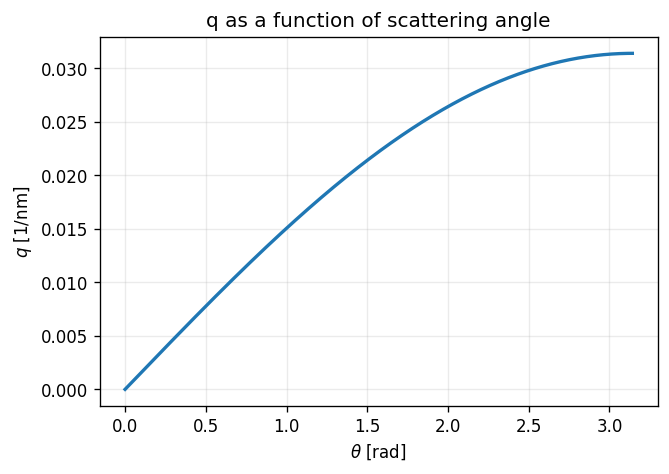

In [18]:
nm = 1.33
wavelength = 532.0  # nm

theta = np.linspace(0, np.pi, 1000)  # radians
q = q_from_theta(theta, nm=nm, wavelength=wavelength)

plt.figure(figsize=(6,4))
plt.plot(theta, q, linewidth=2.0)
plt.xlabel(r"$\theta$ [rad]")
plt.ylabel(r"$q$ [1/nm]")
plt.title("q as a function of scattering angle")
plt.grid(True, alpha=0.25)
plt.show()


## A first look: sphere intensity vs q
For a sphere, the (normalized) amplitude is $F(q)$ and the intensity is $|F(q)|^2$.

Here we plot $|F(q)|^2$ for a single sphere radius.

For a sphere, most intuitive size information is contained in the
small-q (Guinier) regime. At larger q the form factor becomes oscillatory
and encodes detailed shape information.

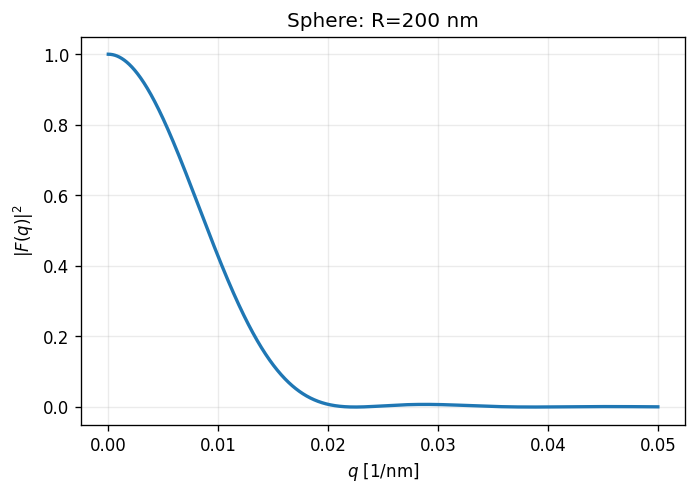

In [19]:
R = 200.0  # nm
q = np.linspace(0, 0.05, 2000)  # 1/nm

F = F_sphere_q(q, R)
I = np.abs(F)**2

plt.figure(figsize=(6.5,4.2))
plt.plot(q, I, linewidth=2.0)
plt.xlabel(r"$q$ [1/nm]")
plt.ylabel(r"$|F(q)|^2$")
plt.title(f"Sphere: R={R:g} nm")
plt.grid(True, alpha=0.25)
plt.show()


### Tip
If you want interactive exploration, run the GUI app:

```bash
python run_app.py
```

### Summary

- The sphere form factor depends on the dimensionless variable qR.
- At small q (qR ≪ 1), the intensity probes the overall particle size.
- At larger q, oscillations encode detailed shape information.

Further examples and comparisons are shown in the next notebooks.